In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
import scipy.stats as ss




In [9]:
# Step 1: Load Data
# Load the dataset
data = pd.read_csv('2019.csv')

# Display dataset summary statistics
print(data.describe())



       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

In [11]:
# Step 2: Data Preprocessing
# Select numeric columns for clustering and regression
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
data_numeric = data[numeric_cols].dropna()

# Normalize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)



In [15]:
# Step 3: Statistical Analysis
from scipy.stats import skew, kurtosis
def describe_data(data):
    """Print descriptive statistics and calculate moments"""
    description = data.describe()
    print(description)
    for col in data.columns:
        col_skew = skew(data[col])
        col_kurt = kurtosis(data[col])
        print(f"{col} - Skewness: {col_skew:.2f}, Kurtosis: {col_kurt:.2f}")
    return description

describe_data(data_numeric)



       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


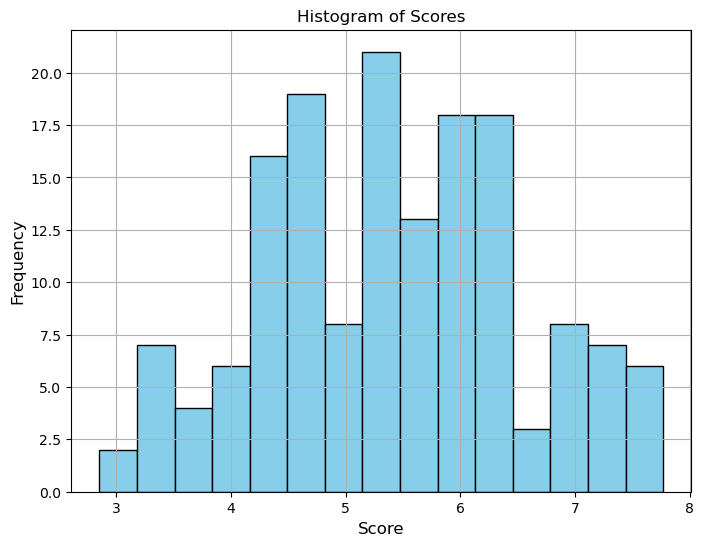

In [33]:
# Step 4: Visualization Functions
# historgam plot
def plot_histogram(data):
    """
    Creates a histogram for a given column in the dataset
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data['Score'], bins=15, color='skyblue', edgecolor='black')
    plt.title('Histogram of Scores', fontsize=12)
    plt.xlabel('Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()
    return
# Call the function
plot_histogram(data)



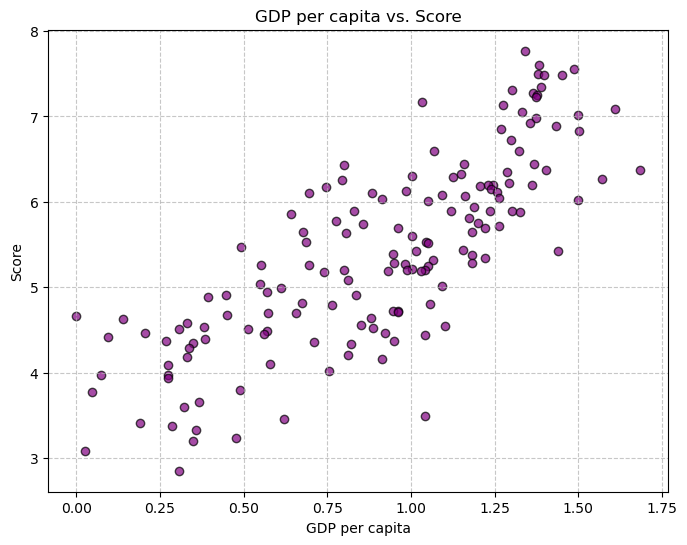

In [31]:
# scatter plot
def plot_scatter(data):
    """
    Creates a scatter plot to analyze the relationship between two variables
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data['GDP per capita'], data['Score'], alpha=0.7, color='purple', edgecolor='k')
    plt.title('GDP per capita vs. Score')
    plt.xlabel('GDP per capita')
    plt.ylabel('Score')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    return

# Call the function
plot_scatter(data)



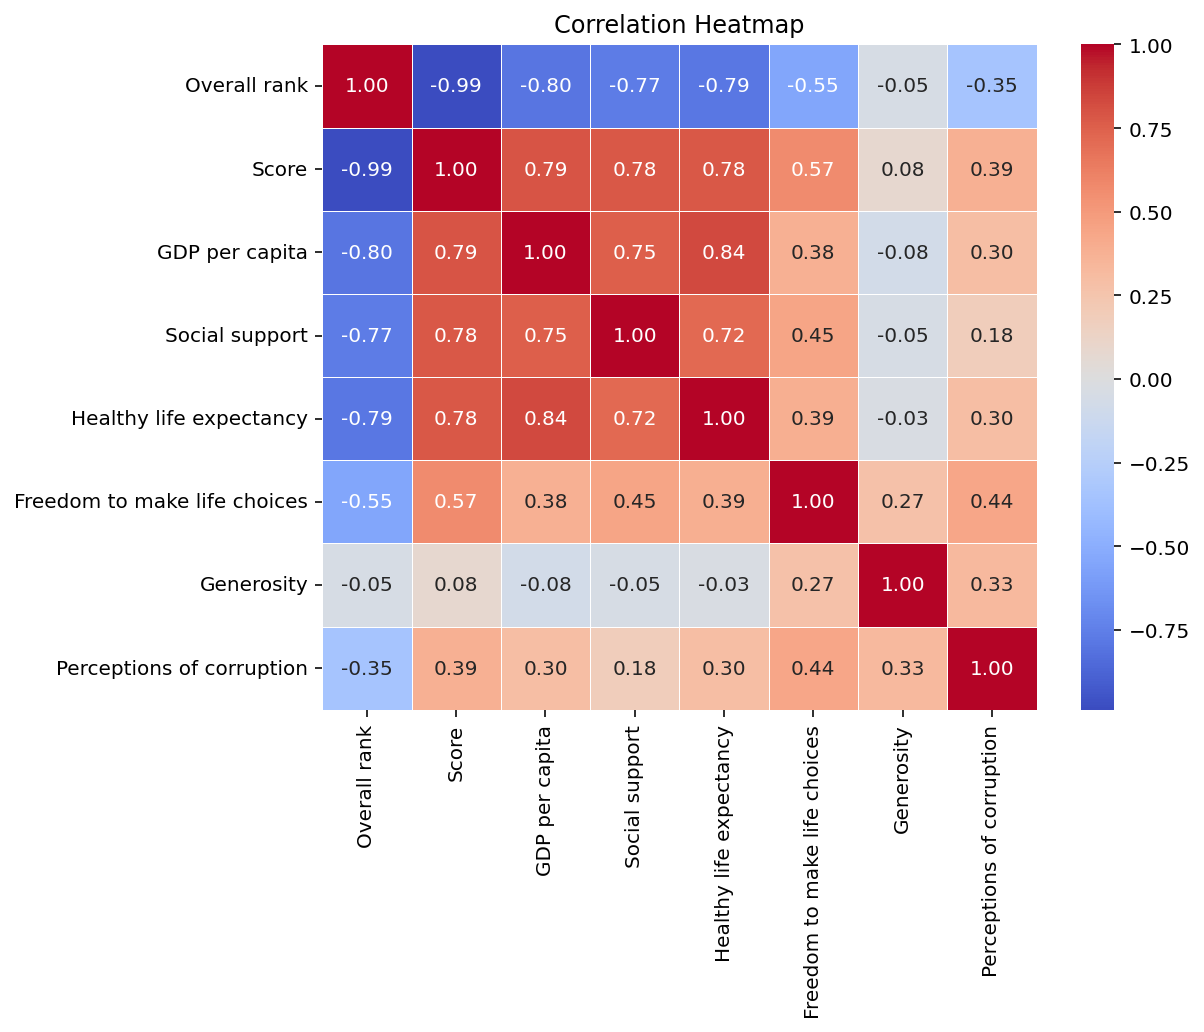

In [29]:
# heatmap graph
def plot_heatmap(data):
    """
    Creates a heatmap of the correlation matrix for the dataset's numerical columns
    """
    # Select only numerical columns for correlation
    numerical_data = data.select_dtypes(include=[np.number])
    
    # Compute the correlation matrix
    corr_matrix = numerical_data.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6), dpi=144)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
    return

# Call the function
plot_heatmap(data)


Silhouette Score for 3 clusters: 0.43089389324266364


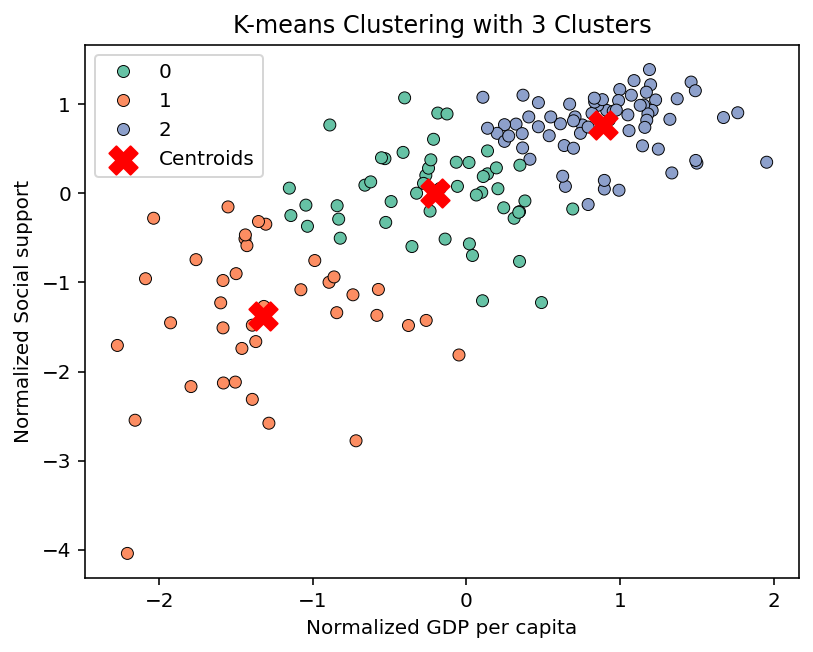

In [23]:
# silhouette score with k-means clustering
def kmeans_clustering(data, n_clusters):
    """
    Perform K-means clustering and plot silhouette scores
    """
    # Normalize the selected columns
    selected_data = data[['GDP per capita', 'Social support']].dropna()
    normalized_data = (selected_data - selected_data.mean()) / selected_data.std()

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(normalized_data)
    labels = kmeans.labels_

    # Silhouette score
    silhouette_avg = silhouette_score(normalized_data, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

    # Scatter plot with clusters
    plt.figure(dpi=144)
    sns.scatterplot(
        x=normalized_data.iloc[:, 0],
        y=normalized_data.iloc[:, 1],
        hue=labels,
        palette='Set2',
        legend='full',
        edgecolor='k'
    )
    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        c='red', s=200, marker='X', label='Centroids'
    )
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.xlabel('Normalized GDP per capita')
    plt.ylabel('Normalized Social support')
    plt.legend()
    plt.show()

# Call the function
kmeans_clustering(data, n_clusters=3)

Line Fit: y = 2.22x + 3.40


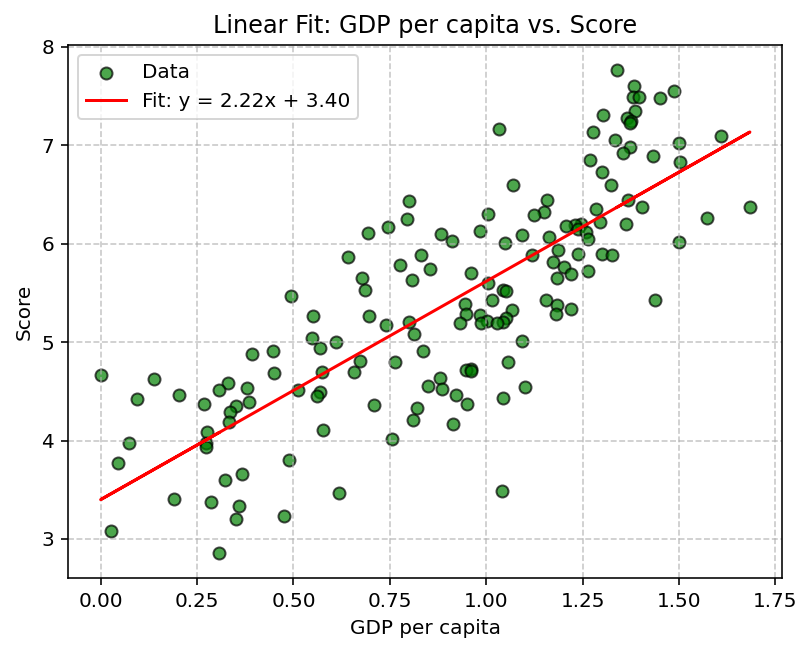

In [27]:
# linear fitting 
def linear_fit(data):
    """
    Perform linear regression fitting and plot the results
    """
    x = data['GDP per capita'].dropna()
    y = data['Score'].dropna()

    # Linear fit
    def linear_model(x, a, b):
        return a * x + b

    params, covariance = curve_fit(linear_model, x, y)
    a, b = params
    print(f"Line Fit: y = {a:.2f}x + {b:.2f}")

    # Plot data and fitted line
    plt.figure(dpi=144)
    plt.scatter(x, y, label='Data', alpha=0.7, color='green', edgecolor='k')
    plt.plot(x, linear_model(x, a, b), color='red', label=f'Fit: y = {a:.2f}x + {b:.2f}')
    plt.title('Linear Fit: GDP per capita vs. Score')
    plt.xlabel('GDP per capita')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Call the function
linear_fit(data)